In [1]:
%matplotlib inline

# Comparing axis-aligned decision tree versus oblique decision tree on iris dataset

Traditional random forest model builds decision trees by recursively splitting the training data along the coordinate axes of the feature space. The oblique decision forest, on the other hand, relaxes this restriction by allowing splits along directions oblique to the coordinate axes. Our proposed new method called Sparse Projection Oblique Randomer Forests (SPORF) utilizes this method over sparse random projections where sparsity is specified on the entire random matrix `A`. 

In this tutorial, we will use the scikit-learn iris example to illustrate characteristics of the oblique decision tree compared to the axis-aligned decision tree. For each pair of iris features, the decision tree learns decision boundaries made of combinations of simple thresholding rules inferred from the training samples. We also show the tree structure of a model built on all of the features. Lastly, we compare overall mean accuracy of the all combinatorial pairs of iris features between axis-aligned and oblqiue decision trees. 

First load the copy of the Iris dataset shipped with scikit-learn:



In [2]:
import sklearn
from sklearn.datasets import load_iris

iris = load_iris()

# Adam Li's oblique tree branch
sklearn.__version__

'1.1.dev0'

The same parameters are used for both the axis-aligned and oblique decision tree experiments. The chosen parameter also reproduces identical decision boundaries demonstrated in scikit-learn [iris tutorial](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py)

In [3]:
kwarg = {
'max_features': 2,
'random_state': 123456}

# plot parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

Display the decision functions of trees trained on all pairs of features. Notice here that trees learn via the typical axis-aligned procedure along coordinate axes directions.



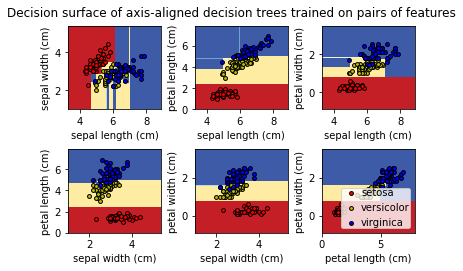

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

acc_rf = []

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier(**kwarg).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    acc_rf.append(accuracy_score(y_true=y, y_pred=clf.predict(X)))

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of axis-aligned decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

Display the structure of a single axis-aligned decision tree trained on all the features
together.



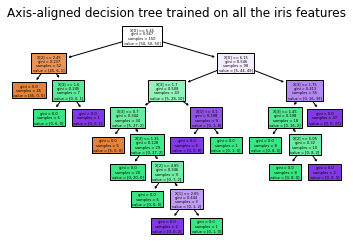

In [5]:
from sklearn.tree import plot_tree

plt.figure()
clf = DecisionTreeClassifier(**kwarg).fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Axis-aligned decision tree trained on all the iris features")
plt.show()

The following experiment demonstrates oblique decision tree algorithm performed on the same iris dataset using the same parameters used for axis-aligned random forest. The decision boundary shows noticeable oblique patterns considerably different from that of axis-aligned decision trees. The oblqiue nature of split gives more degrees of freedom granting flexibility via inducing an appropriate amount of sparsity in the random projections.


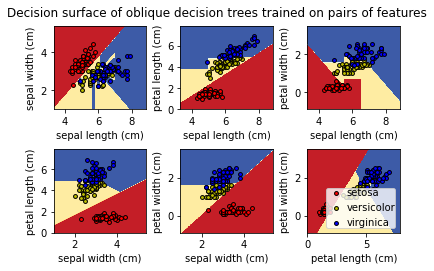

In [6]:
from sklearn.tree import ObliqueDecisionTreeClassifier

acc_of = []

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = ObliqueDecisionTreeClassifier(**kwarg).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    acc_of.append(accuracy_score(y_true=y, y_pred=clf.predict(X)))

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of oblique decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

Display the structure of a single oblique decision tree trained on all the features together.



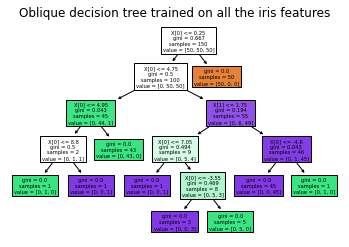

In [7]:
plt.figure()
clf = ObliqueDecisionTreeClassifier(**kwarg).fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Oblique decision tree trained on all the iris features")
plt.show()

Despite axis-favorable nature of iris dataset, the oblique decision tree performs comparable to the axis-aligned decision tree. Also notice that the oblique decision tree is shallower than the axis-aligned decision tree under this axis-favorable setting

In [8]:
print(f'The overall accuracy for axis-aligned decision tree is {np.mean(acc_rf)} \
        \nThe overall accuracy for oblique decision tree is {np.mean(acc_of)}')

The overall accuracy for axis-aligned decision tree is 0.9755555555555556         
The overall accuracy for oblique decision tree is 0.9733333333333333
